In [1]:
import urllib
import arxiv
import requests
import json
import csv
import pandas as pd
from collections import Counter, defaultdict
import numpy as np # for array manipulation
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline 
import datetime

In [2]:
search = arxiv.Search(
  query = "graphene",
  max_results = 10,
  sort_by = arxiv.SortCriterion.SubmittedDate
)

for result in search.results():
  print(result.title)

Tunable Dot Platform for Controlling Electron Flow in Graphene
Defects Potentials for Two-Dimensional Topological Materials
Probing aqueous interfaces with spin defects
Localized and quasi-localized energy levels in the electron spectrum of graphene with isolated boron and nitrogen substitutions
Versatile multi-q antiferromagnetic charge order in correlated vdW metals
The interplay of ferroelectricity and magneto-transport in non-magnetic moiré superlattices
Twist-Tunable Spin-to-Charge Conversion and Valley-Contrasting Effects in Graphene/TMDC Heterostructures
Machine Learning Accelerated Computational Surface-Specific Vibrational Spectroscopy Reveals Oxidation Level of Graphene in Contact with Water
Electronic structure and optical absorption of armchair graphene/boron nitride lateral heterostructures from first principles and models
Superconductivity induced by spin-orbit coupling in a two-valley ferromagnet


/tmp/ipykernel_105769/3772056595.py:7: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  for result in search.results():


In [3]:
import arxiv

client = arxiv.Client(page_size=100, delay_seconds=3, num_retries=3)

search = arxiv.Search(
    query='"quantum dots"',
    sort_by=arxiv.SortCriterion.Relevance,
    sort_order=arxiv.SortOrder.Descending,
)

results = []
max_results_to_fetch = 1000  # ile maksymalnie chcesz pobrać

for i, paper in enumerate(client.results(search)):
    results.append(paper)
    if i + 1 >= max_results_to_fetch:
        break

print(f"Pobrano {len(results)} wyników.")


Pobrano 1000 wyników.


In [5]:
qd_df = pd.DataFrame([vars(paper) for paper in results])

In [6]:
qd_df.head(10)

,entry_id,updated,published,title,authors,summary,comment,journal_ref,doi,primary_category,categories,links,pdf_url,_raw
0,http://arxiv.org/abs/cond-mat/0310363v1,2003-10-15 20:15:59+00:00,2003-10-15 20:15:59+00:00,Excitonic properties of strained wurtzite and ...,"[Vladimir A. Fonoberov, Alexander A. Balandin]",We investigate exciton states theoretically in...,"18 pages, accepted for publication in the Jour...","J. Appl. Phys. 94, 7178 (2003)",10.1063/1.1623330,cond-mat.mes-hall,[cond-mat.mes-hall],"[http://dx.doi.org/10.1063/1.1623330, http://a...",http://arxiv.org/pdf/cond-mat/0310363v1,{'id': 'http://arxiv.org/abs/cond-mat/0310363v...
1,http://arxiv.org/abs/2008.11666v1,2020-08-26 16:48:21+00:00,2020-08-26 16:48:21+00:00,A two-dimensional array of single-hole quantum...,"[F. van Riggelen, N. W. Hendrickx, W. I. L. La...",Quantum dots fabricated using techniques and m...,"7 pages, 4 figures",None,10.1063/5.0037330,cond-mat.mes-hall,[cond-mat.mes-hall],"[http://dx.doi.org/10.1063/5.0037330, http://a...",http://arxiv.org/pdf/2008.11666v1,"{'id': 'http://arxiv.org/abs/2008.11666v1', 'g..."
2,http://arxiv.org/abs/cond-mat/0411742v1,2004-11-30 02:56:15+00:00,2004-11-30 02:56:15+00:00,Polar optical phonons in wurtzite spheroidal q...,"[Vladimir A. Fonoberov, Alexander A. Balandin]",Polar optical-phonon modes are derived analyti...,11 pages,"J. Phys.: Condens. Matter 17, 1085 (2005)",10.1088/0953-8984/17/7/003,cond-mat.mes-hall,[cond-mat.mes-hall],"[http://dx.doi.org/10.1088/0953-8984/17/7/003,...",http://arxiv.org/pdf/cond-mat/0411742v1,{'id': 'http://arxiv.org/abs/cond-mat/0411742v...
3,http://arxiv.org/abs/1403.4790v1,2014-03-19 13:03:49+00:00,2014-03-19 13:03:49+00:00,Group-velocity slowdown in quantum-dots and qu...,"[Stephan Michael, Weng W. Chow, Hans Christian...",We investigate theoretically the slowdown of o...,Physics and Simulation of Optoelectronic Devic...,None,10.1117/12.2042412,cond-mat.mes-hall,"[cond-mat.mes-hall, cond-mat.mtrl-sci]","[http://dx.doi.org/10.1117/12.2042412, http://...",http://arxiv.org/pdf/1403.4790v1,"{'id': 'http://arxiv.org/abs/1403.4790v1', 'gu..."
4,http://arxiv.org/abs/cond-mat/0403328v1,2004-03-12 18:28:06+00:00,2004-03-12 18:28:06+00:00,A new method to epitaxially grow long-range or...,"[J. Bauer, D. Schuh, E. Uccelli, R. Schulz, A....",We report on a new approach for positioning of...,None,None,None,cond-mat.mes-hall,[cond-mat.mes-hall],"[http://arxiv.org/abs/cond-mat/0403328v1, http...",http://arxiv.org/pdf/cond-mat/0403328v1,{'id': 'http://arxiv.org/abs/cond-mat/0403328v...
5,http://arxiv.org/abs/cond-mat/0411484v1,2004-11-18 16:47:14+00:00,2004-11-18 16:47:14+00:00,Giant optical anisotropy in a single InAs quan...,"[I. Favero, Guillaume Cassabois, A. Jankovic, ...",We present the experimental evidence of giant ...,submitted to Applied Physics Letters,None,10.1063/1.1854733,cond-mat.other,[cond-mat.other],"[http://dx.doi.org/10.1063/1.1854733, http://a...",http://arxiv.org/pdf/cond-mat/0411484v1,{'id': 'http://arxiv.org/abs/cond-mat/0411484v...
6,http://arxiv.org/abs/1003.2350v1,2010-03-11 15:52:09+00:00,2010-03-11 15:52:09+00:00,Linewidth broadening of a quantum dot coupled ...,"[Arka Majumdar, Andrei Faraon, Erik Kim, Dirk ...",We study the coupling between a photonic cryst...,"5 pages, 4 figures",None,10.1103/PhysRevB.82.045306,quant-ph,[quant-ph],"[http://dx.doi.org/10.1103/PhysRevB.82.045306,...",http://arxiv.org/pdf/1003.2350v1,"{'id': 'http://arxiv.org/abs/1003.2350v1', 'gu..."
7,http://arxiv.org/abs/1206.2674v1,2012-06-12 21:00:22+00:00,2012-06-12 21:00:22+00:00,Effective microscopic theory of quantum dot su...,[U. Aeberhard],We introduce a quantum dot orbital tight-bindi...,"9 pages, 6 figures; Special Issue: Numerical S...","Optical and Quantum Electronics 44, 133 (2012)",10.1007/s11082-011-9529-9,cond-mat.mes-hall,"[cond-mat.mes-hall, cond-mat.mtrl-sci]","[http://dx.doi.org/10.1007/s11082-011-9529-9, ...",http://arxiv.org/pdf/1206.2674v1,"{'id': 'http://arxiv.org/abs/1206.267

In [7]:
list(qd_df)

['entry_id',
 'updated',
 'published',
 'title',
 'authors',
 'summary',
 'comment',
 'journal_ref',
 'doi',
 'primary_category',
 'categories',
 'links',
 'pdf_url',
 '_raw']

In [9]:
# Add a first_author column: the name of the first author among each paper's list of authors.
qd_df['first_author'] = [authors_list[0].name for authors_list in qd_df['authors']]
# Keep a reference to the original results in the dataframe: this is useful for downloading PDFs.
qd_df['_result'] = results

# Narrow our dataframe to just the columns we want for our analysis.
qd_df = qd_df[['title', 'published', 'first_author', '_result']]
qd_df

,title,published,first_author,_result
0,Excitonic properties of strained wurtzite and ...,2003-10-15 20:15:59+00:00,Vladimir A. Fonoberov,http://arxiv.org/abs/cond-mat/0310363v1
1,A two-dimensional array of single-hole quantum...,2020-08-26 16:48:21+00:00,F. van Riggelen,http://arxiv.org/abs/2008.11666v1
2,Polar optical phonons in wurtzite spheroidal q...,2004-11-30 02:56:15+00:00,Vladimir A. Fonoberov,http://arxiv.org/abs/cond-mat/0411742v1
3,Group-velocity slowdown in quantum-dots and qu...,2014-03-19 13:03:49+00:00,Stephan Michael,http://arxiv.org/abs/1403.4790v1
4,A new method to epitaxially grow long-range or...,2004-03-12 18:28:06+00:00,J. Bauer,http://arxiv.org/abs/cond-mat/0403328v1
...,...,...,...,...
995,Peculiar spectra of dark and bright excitons i...,2018-10-09 06:42:29+00:00,Michał Zieliński,http://arxiv.org/abs/1810.03831v1
996,Long-distance entangling gates between quantum...,2019-02-15 06:38:15+00:00,Ada Warren,http://arxiv.org/abs/1902.05704v2
997,"Valley filters, accumulators, and switches ind...",2019-09-27 05:08:10+00:00,Mohammadhadi Azari,http://arxiv.org/abs/1909.12495v1
998,Quantum Dots at Room Temperature carved out fr...,2012-11-19 20:18:05+00:00,Amelia Barreiro,http://arxiv.org/abs/1211.4551v2


<Axes: xlabel='published'>

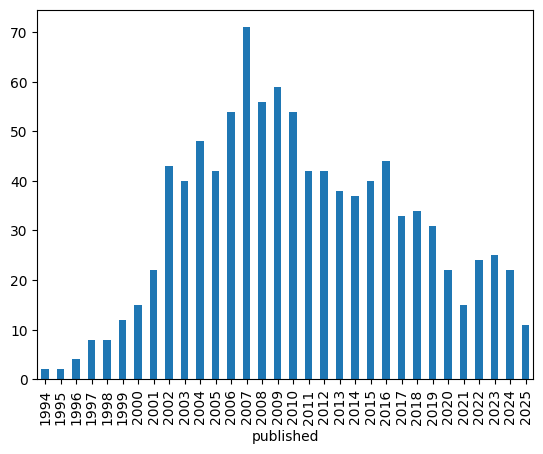

In [10]:
qd_df["published"].groupby(qd_df["published"].dt.year).count().plot(kind="bar")

In [11]:
qd_authors = qd_df.groupby(qd_df["first_author"])["first_author"].count().sort_values(ascending=False)
qd_authors.head(20)

first_author
S. Mackowski              5
Weijiang Gong             5
S. Illera                 4
Luca Banszerus            4
Matthias Braun            3
A. Lafuente-Sampietro     3
Michael Lorke             3
Arka Majumdar             3
A. Grodecka               3
R. Seguin                 3
Ulrich Hohenester         3
E. A. Muljarov            3
A. N. Poddubny            3
M. R. Buitelaar           3
S. Gustavsson             3
Li-Bo Chen                3
Stephan Michael           3
Jian-Qi Zhang             3
Manuel Valin-Rodriguez    2
Dmitri S. Golubev         2
Name: first_author, dtype: int64

In [12]:
qd_Trocha_sorted  = qd_df[qd_df['first_author']=='Piotr Trocha'].sort_values('published')
qd_Trocha_sorted

,title,published,first_author,_result
837,Dicke-like effect in spin-polarized transport ...,2007-11-22 16:11:11+00:00,Piotr Trocha,http://arxiv.org/abs/0711.3611v2
